# Univariate Modelling

In [1]:
import os

import numpy as np
import pandas as pd

data_file = os.path.join('..', '..', 'data', 'interim', 'all_train.csv')
test_file = os.path.join('..', '..', 'data', 'raw', 'test.csv')
raw_data_file = os.path.join('..', '..', 'data', 'raw', 'train.csv')
df = pd.read_csv(data_file, index_col=0)
df.head()

,p_num,days_since_start,time,initial_resolution,bg,insulin,carbs,hr,steps,cals,activity,bg+1:00
2020-01-01 00:15:00,p01,0,00:15:00,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:20:00,p01,0,00:20:00,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:25:00,p01,0,00:25:00,15min,9.6,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:30:00,p01,0,00:30:00,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:35:00,p01,0,00:35:00,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

## 1. Add feature day phase

In [2]:
from src.features.transformers import DayPhaseTransformer, PropertyOutlierTransformer

day_phase_transformer = DayPhaseTransformer(time_column='time', time_format='%H:%M:%S', result_column='day_phase')
df = day_phase_transformer.fit_transform(X=df)
df.head()

,p_num,days_since_start,time,day_phase,initial_resolution,bg,insulin,carbs,hr,steps,cals,activity,bg+1:00
2020-01-01 00:15:00,p01,0,00:15:00,night,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:20:00,p01,0,00:20:00,night,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:25:00,p01,0,00:25:00,night,15min,9.6,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:30:00,p01,0,00:30:00,night,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:35:00,p01,0,00:35:00,night,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN


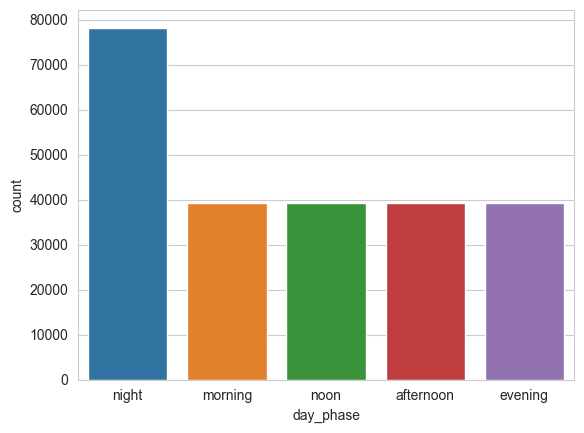

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(data=df, x='day_phase', hue='day_phase')
plt.show()

# Clean Data Transformers

## 1. Drop columns

In [18]:
# read raw data
df = pd.read_csv(raw_data_file, low_memory=False)
df.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


## Drop columns that start with 'activity' and 'cals'

In [19]:
from src.features.transformers import DropColumnsTransformer

parameters = ['bg', 'insulin', 'carbs', 'hr', 'steps', 'cals', 'activity']

print(f'Number of columns before: {len(df.columns)}')

drop_patterns = ['activity', 'carbs']

for pattern in drop_patterns:
    drop_columns_transformer = DropColumnsTransformer(starts_with=pattern)
    df = drop_columns_transformer.fit_transform(X=df)

print(f'Number of columns after: {len(df.columns)}')
df.head()

Number of columns before: 508
Number of columns after: 364


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [20]:
from src.features.transformers import FillPropertyNaNsTransformer

parameter_strategy = {
    'bg': ['interpolate', 'median'],
    'insulin': ['zero'],
    'cals': ['interpolate', 'median'],
    'hr': ['interpolate', 'median'],
    'steps': ['zero'],
}

for parameter, strategy in parameter_strategy.items():
    fill_property_nans_transformer = FillPropertyNaNsTransformer(parameter, strategy)
    df = fill_property_nans_transformer.fit_transform(X=df)

df.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
0,p01_0,p01,06:10:00,9.6,9.6,9.6,9.633333,9.666667,9.7,9.533333,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,13.4
1,p01_1,p01,06:25:00,9.7,9.7,9.7,9.533333,9.366667,9.2,9.033333,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,12.8
2,p01_2,p01,06:40:00,9.2,9.2,9.2,9.033333,8.866667,8.7,8.600000,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,15.5
3,p01_3,p01,06:55:00,8.7,8.7,8.7,8.600000,8.500000,8.4,8.300000,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,14.8
4,p01_4,p01,07:10:00,8.4,8.4,8.4,8.300000,8.200000,8.1,8.166667,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,12.7


## Ouliers Detection and Impuation

In [21]:
import numpy as np
(df.select_dtypes(include=np.number)<0).any().any()

np.True_

In [22]:
def filter_function(x):
    return x < 0

outliers_transformer = PropertyOutlierTransformer('insulin', fill_strategy='zero', filter_function=filter_function)
df = outliers_transformer.fit_transform(X=df)
df.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
0,p01_0,p01,06:10:00,9.6,9.6,9.6,9.633333,9.666667,9.7,9.533333,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,13.4
1,p01_1,p01,06:25:00,9.7,9.7,9.7,9.533333,9.366667,9.2,9.033333,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,12.8
2,p01_2,p01,06:40:00,9.2,9.2,9.2,9.033333,8.866667,8.7,8.600000,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,15.5
3,p01_3,p01,06:55:00,8.7,8.7,8.7,8.600000,8.500000,8.4,8.300000,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,14.8
4,p01_4,p01,07:10:00,8.4,8.4,8.4,8.300000,8.200000,8.1,8.166667,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,12.7


In [23]:
import numpy as np
(df.select_dtypes(include=np.number)<0).any().any()

np.False_